# Final Report

## Gender's Relation to Mean Age of Gymnastics Olympic Medalists

## Introduction

For this project we will be using “120 years of Olympic history: athletes and results” data set found on Kaggle, accessible here: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results  
The original data set was scraped from https://www.sports-reference.com/ (Forman, 2000). 

The data set contains 271116 rows that correspond to individual athletes that have competed in an Olympic event and 15 columns (ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal). 

For our research question, we will be investigating  how gender effects the mean age of Olympic medalists, who won a medal in gymnastics from the year 1912 onwards. Studies on US-based newspapers found that the common media portrayal of women’s gymnastics “has long been viewed as a sport dominated not by women, as the name suggests, but instead by girls” (Eagleman et al., 2014). Performance research and firsthand account of professional coaches point towards the difference in physical development between men and woman as a reason for the seemingly younger demographic of female gymnasts. Whilst men gain more muscle mass after puberty, women experience more physical changes which alter the physics of their sport, requiring female gymnasts to re-learn skills as they age (Weimann, 2002; Jutkiewicz, 2017). However, there is conflicting research which found that predominantly older female gymnasts reached the highest levels of competition, thus calling into question whether youth is truly a determining factor in success of female competitors (Jelaska et al., 2017). Given the uncertainty surrounding the relationship between gender and age of gymnasts, this report aims to investigate whether there is a significant difference in mean age for winning Olympic gymnasts of different genders.

## Methods and Results

We have first downloaded the data set from Kaggle. https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results .

Here, we load all the libraries that we might need to clean, wrangle and visualise the data.

In [2]:
library(cowplot)
library(datateachr)
library(dplyr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(ggplot2)
library(broom)
options(repr.matrix.max.rows = 6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We used read_csv to load the data which was downloaded from kaggle and then uploaded into the jupyter notebook folder (and then pushed to the github repository).

In [3]:
olympic_data <- read_csv("athlete_events.csv")
head(olympic_data)

Rows: 271116 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


For our inferential study we are going to look at the data from the year 1912 and onwards.

Since, we only want to assess the proportion of Gymnasts who won a medal in the Olympics in the event Gymnastics Men's/Women's Individual All-Around, we are going to filter the data so we only have the Gymnastics data. Furthermore, we are only selecting the columns we require for our study.

In [4]:
gymnast_data <- olympic_data |> 
                        filter(Year >= 1912) |> 
                        filter(!is.na(Age)) |>
                        filter(Sport == "Gymnastics" & (Event == "Gymnastics Men's Individual All-Around" | Event == "Gymnastics Women's Individual All-Around")) |>
                        select(Sex , Age, Medal)
nrow(gymnast_data)
head(gymnast_data)

[1] 3579

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,28,Bronze
M,32,NA
M,23,NA
M,19,NA
M,22,NA
F,19,NA


We know that, Individuals are drawn without replacement from the population, so independence can never be achieved. Since, our population size is 3579, it is safe to take a sample of size 350 for our inferential study upon the assumption that the samples taken are independent of each other, since, we are taking the sample size to be < 10% of the population size.

In [5]:
set.seed(4)

gymnast_sample <- gymnast_data |> 
                  sample_n(size = 350)

head(gymnast_sample)

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,21,NA
F,31,NA
M,27,NA
M,21,NA
M,24,NA
M,19,NA


In [6]:
#Summarising the column of interest
summary(gymnast_sample$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   19.00   23.00   22.53   26.00   38.00 

We group our data by sex and medal type so we can calculate the standard deviation and mean for each type of medal, separated by gender. 

In [7]:
options(repr.matrix.max.rows = 10)
gymnast_sample_grouped <- gymnast_sample |> 
                        group_by(Sex , Medal) |>
                        summarise(mean_Age = mean(Age) , sd_Age = sd(Age))


gymnast_sample_grouped

`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


Sex,Medal,mean_Age,sd_Age
<chr>,<chr>,<dbl>,<dbl>
F,Bronze,17.50000,2.121320
F,Gold,22.33333,3.511885
F,Silver,24.50000,9.192388
F,NA,19.24060,3.921870
M,Bronze,26.00000,2.828427
M,Gold,22.00000,1.414214
M,Silver,29.00000,4.358899
M,NA,24.60099,3.814174


Since we want to know how gender affects the mean age of Olympic medalists, for each gender, we filter our data to seperate the medalists and non medalists, then summarise our data using the rbind function to combine it into one table. 

In [2]:
female_no_medal <- gymnast_sample_grouped |>
                    filter(Sex == "F" , is.na(Medal))|>
                    select(-Medal) |>
                    mutate(Medal = "No", mean_age = mean_Age, sd_age = sd_Age) |>
                    select(-mean_Age , -sd_Age)
male_no_medal <- gymnast_sample_grouped |>
                    filter(Sex == "M" , is.na(Medal))|>
                    select(-Medal) |>
                    mutate(Medal = "No", mean_age = mean_Age , sd_age = sd_Age)|>
                    select(-mean_Age , -sd_Age)
female_medal <- gymnast_sample_grouped |>
                    filter(Sex == "F" , !is.na(Medal)) |>
                    group_by(Sex) |>
                    summarise(mean_age = mean(mean_Age) , sd_age = mean(sd_Age)) |>
                    mutate(Medal = "Yes")
male_medal <- gymnast_sample_grouped |>
                    filter(Sex == "M" , !is.na(Medal)) |>
                    group_by(Sex) |>
                    summarise(mean_age = mean(mean_Age) , sd_age = mean(sd_Age))|>
                    mutate(Medal = "Yes")

gymnast_sample_summary <- rbind(female_no_medal , male_no_medal , female_medal , male_medal)

gymnast_sample_summary

ERROR: Error in select(mutate(select(filter(gymnast_sample_grouped, Sex == "F", : could not find function "select"


### Visualization

Since we want to find the difference in mean age for male and female gymnasts, we can plot histograms of the age distributions for each gender and compare the two.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


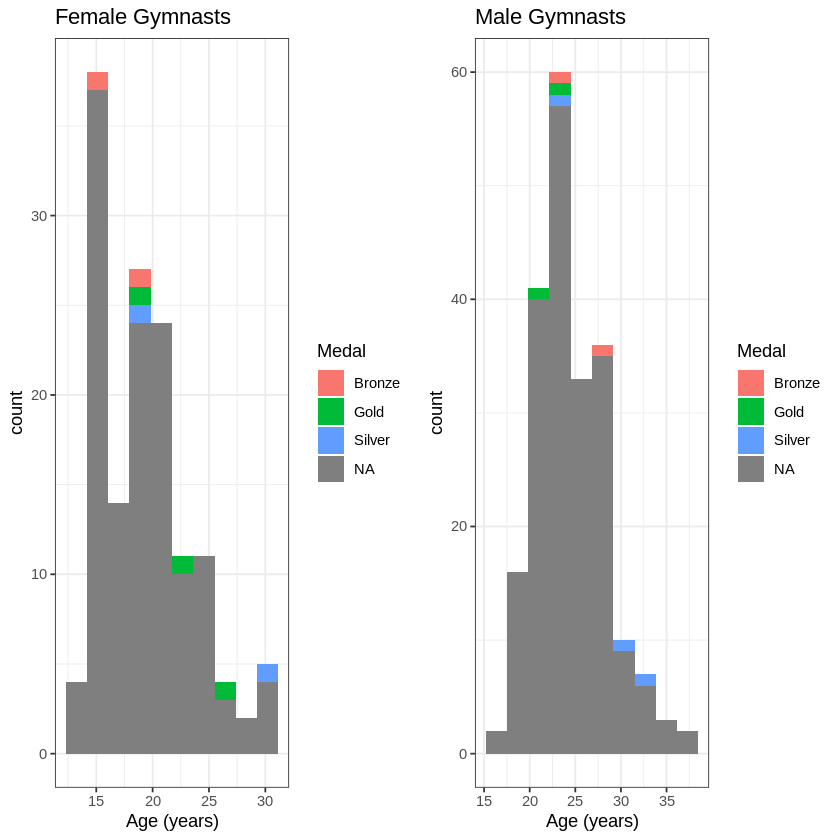

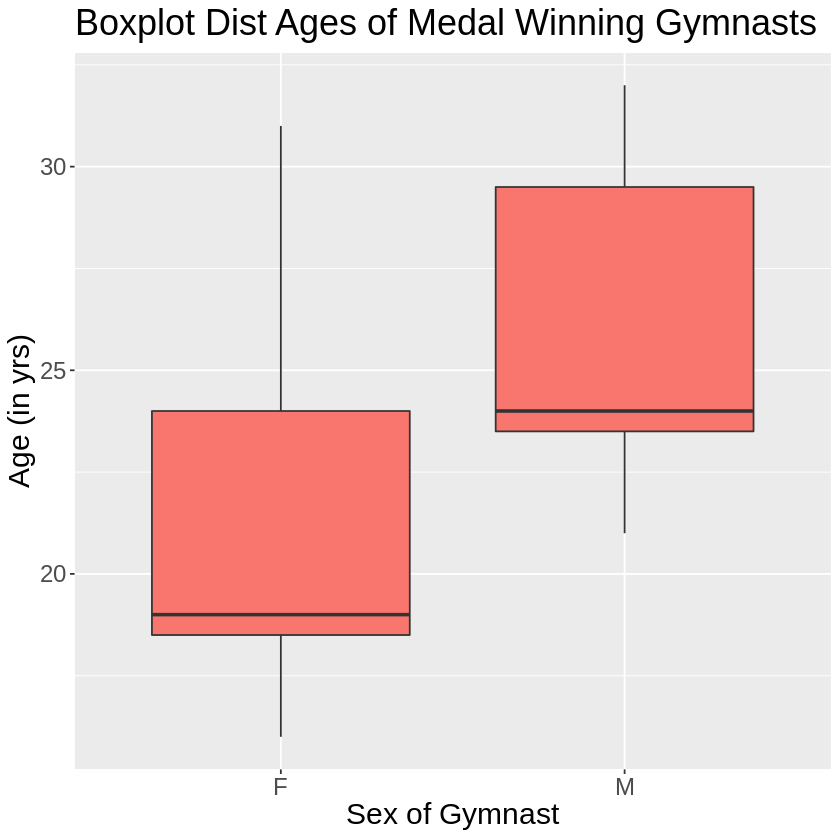

In [9]:
# filtering sample for female gymnasts only and ploting the age distribution
female_age_plot <- gymnast_sample |>
    filter(Sex == 'F') |>
    ggplot(aes(x=Age, fill = Medal)) +
    geom_histogram(bins = 10) +
    labs(title = "Female Gymnasts",
         x = "Age (years)") +
    theme_bw()

# filtering sample for male gymnasts only and ploting the age distribution
male_age_plot <- gymnast_sample |>
    filter(Sex == 'M') |>
    ggplot(aes(x=Age, fill = Medal)) +
    geom_histogram(bins = 10) +
    labs(title = "Male Gymnasts",
         x = "Age (years)") +
    theme_bw()

# comparing the distribution plots between the two genders
age_comparison <- plot_grid(female_age_plot, male_age_plot)
age_comparison

# a boxplot to examin the spread of medal winners seperated by genders
boxplot1 <- gymnast_sample |> 
            filter(!is.na(Medal)) |>
            ggplot() +
            geom_boxplot(aes(Sex , Age, fill = "Blue")) +
            theme(text = element_text(size = 18)) +
            ggtitle("Boxplot Dist Ages of Medal Winning Gymnasts") + 
            xlab("Sex of Gymnast") + 
            ylab("Age (in yrs)") + 
            guides(fill = FALSE)
boxplot1

One of the biggest advantages of this report is the sample population we are using for the argument, olympic gymnast. By using olympic gymnasts, it directly reflects those competing at the highest levels, at the same tournaments. This not only minimizes selection bias, but also systemic bias, as our sample includes individuals/athletes from all around the world due to the nature of olympics as a major international multi-sport event.

As shown above, we were able to calculate the point estimate mean age, and produce graphs that help us visualize those point estimates that help us draw a relationship between the age and the successfulness in winning a medal for olympic gymnasts of both genders. However, we know nothing about the reliability of these results. To address this we will be conducting a hypothesis test and calculating a two-tailed 95% confidence interval.

For both genders, the hypothesis test we will assign the:

$$H_0: \mu_{\text{Age of Male Medalists}} - \mu_{\text{Age of Female Medalists}} = 0$$ $$H_1: \mu_{\text{Age of Male Medalists}} - \mu_{\text{Age of Female Medalists}} \neq 0$$

Answering the following questions:
What do we expect to find? What impact could such findings have? What future questions could this lead to?

We expect the p-value from the hypothesis test to be less than 0.05 ($p < 0.05$), as this would indicate that the deviations from the null hypothesis to be statistically significant, allowing us to reject the null hypothesis. As for the confidence interval, the sample we are using is considered large ($n > 50$) with small variability in the data. Therefore a 95% confidence interval should provide a fairly low margin of error, allowing us to prove that the estimates are reliable. This would help us conclude that age does in fact play a role in the performances of athletes for both genders. 

# Results

## Bootstrapping

We change the Medal column into a categorical variable that can take on the value of either “Yes” if the gymnast has won a medal or “No” if they have not. 

In [10]:
gymnast_sample["Medal"][gymnast_sample["Medal"] == "Bronze"] <- "Yes"
gymnast_sample["Medal"][gymnast_sample["Medal"] == "Silver"] <- "Yes"
gymnast_sample["Medal"][gymnast_sample["Medal"] == "Gold"] <- "Yes"
gymnast_sample["Medal"][is.na(gymnast_sample["Medal"])] <- "No"


head(gymnast_sample)

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,21,No
F,31,No
M,27,No
M,21,No
M,24,No
M,19,No


### Male Gymnasts

We filter our sample to only contain male gymnasts by filtering the ‘Sex’ variable to only contain “F”. Then, 
Using the infer workflow, we specify the variables ‘Age’  and ‘Medal’ that we are interested in, take 1000 bootstrap samples from gymnast_sample and calculate the difference in means between medalists (Medal== “Yes”) and  non medalists (Medal==“No”) for each sample.

In [11]:
set.seed(201)
male_gymnast_resamples<-gymnast_sample %>%
                    filter(Sex == "M")%>%
                    specify(Age~Medal)%>%
                    generate(reps=1000, type="bootstrap")%>%
                    calculate(stat="diff in means", order=c("Yes", "No"))

                    
head(male_gymnast_resamples)

replicate,stat
<int>,<dbl>
1,-0.145631068
2,1.356327090
3,0.803921569
4,2.679455446
5,1.189356436
6,0.004878049


We then use the get_confidence_interval function, using type ‘percentile’ to specify the method, with the bootstrap distribution we just generated (male_gymnast_resamples) to calculate a 95% confidence interval for the mean. 

In [12]:
male_gymnast_ci<-male_gymnast_resamples %>%
  get_confidence_interval(level = 0.95, type = "percentile")
male_gymnast_ci

lower_ci,upper_ci
<dbl>,<dbl>
-1.547327,4.923341


Next we visualize our confidence interval (male_gymnast_ci) we obtained and use the function shade_ci ontop of our bootstrap distribution(male_gymnast_resamples) to visualize the endpoints of our confidence interval. 

In [4]:
male_gymnast_vis<-male_gymnast_resamples%>%
                    visualize()+
                    ggtitle("Male Age Bootstrap Distribution with 95% Confidence Interval")+
                    labs(x="Difference in Average Age")+
                    shade_ci(endpoints = male_gymnast_ci, color="red")
male_gymnast_vis

ERROR: Error in male_gymnast_resamples %>% visualize(): could not find function "%>%"


### Female Gymnasts

We filter our sample to only contain female gymnasts by filtering the ‘Sex’ variable to only contain “F”. Then, Using the infer workflow, we specify the variables ‘Age’  and ‘Medal’ that we are interested in, take 1000 bootstrap samples from gymnast_sample and calculate the difference in means between medalists (Medal== “Yes”) and  non medalists (Medal==“No”) for each sample.


In [14]:
set.seed(201)
female_gymnast_resamples<-gymnast_sample %>%
                    filter(Sex == "F")%>%
                    specify(Age~Medal)%>%
                    generate(reps=1000, type="bootstrap")%>%
                    calculate(stat="diff in means", order=c("Yes", "No"))

                    
head(female_gymnast_resamples)

replicate,stat
<int>,<dbl>
1,1.4154229
2,-0.4477612
3,2.5769231
4,11.4492754
5,1.7548770
6,0.8674242


We then use the get_confidence_interval function, using type ‘percentile’ to specify the method, with the bootstrap distribution we just generated (female_gymnast_resamples) to calculate a 95% confidence interval for the mean. 

In [15]:
female_gymnast_ci<-female_gymnast_resamples %>%
  get_confidence_interval(level = 0.95, type = "percentile")
female_gymnast_ci

lower_ci,upper_ci
<dbl>,<dbl>
-1.316235,6.501679


Next we visualize our confidence interval (female_gymnast_ci) we obtained and use the function shade_ci ontop of our bootstrap distribution(female_gymnast_resamples) to visualize the endpoints of our confidence interval. 


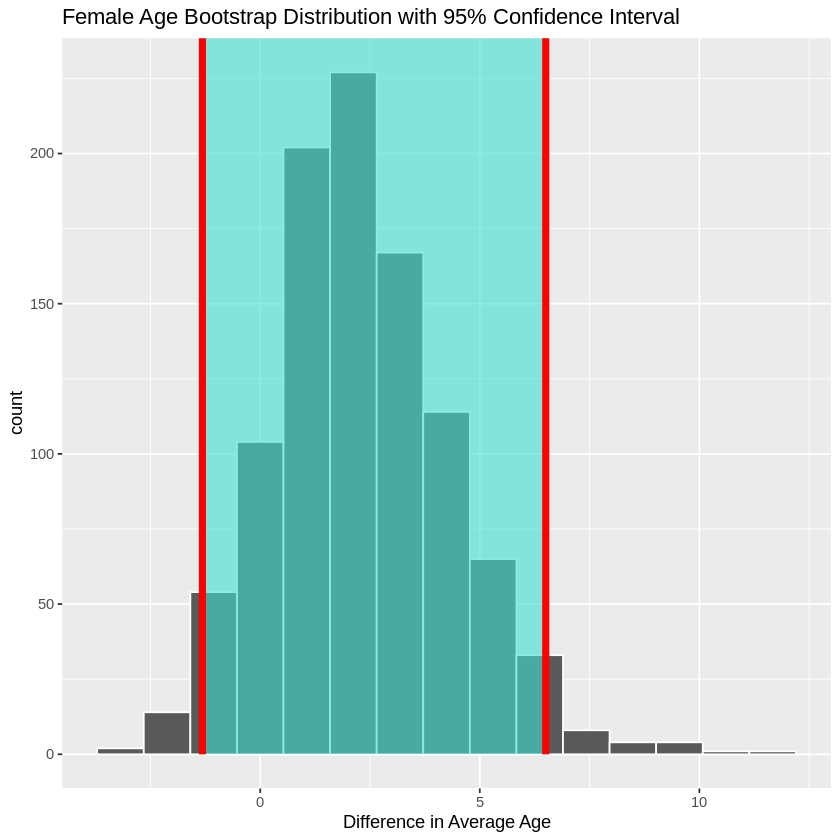

In [16]:
female_gymnast_vis<-female_gymnast_resamples%>%
                    visualize()+
                    ggtitle("Female Age Bootstrap Distribution with 95% Confidence Interval")+
                    labs(x="Difference in Average Age")+
                    shade_ci(endpoints = female_gymnast_ci, color="red")
female_gymnast_vis

## Hypothesis Test

For the Hypotheis Test we will be using a two sample t-test to test the difference between 2 **independent** populations' means, i.e, Male Gymnasts who won medals and Female Gymnasts who won medals. We are not performin a z-test here becuase we don't have access to $\sigma$ of the population.

Our Hypothsis test formulated is 
- $H_0: \mu_\text{Age of males who won medals} - \mu_\text{Age of females who won medals} = 0$
- $H_1: \mu_\text{Age of males who won medals} - \mu_\text{Age of females who won medals} \neq 0$


Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$


To calculate the test statistic, first we create a data set that contains all necessary information by filtering out all the non medalists, removing the medal column, grouping by Sex then calculating the mean age, standard deviation and n value for each gender. 


In [17]:
# making a dataframe with all the necesaary info for test statistic from the sample above
gymnast_winners_summary <- gymnast_sample |> 
                        filter(!is.na(Medal)) |> 
                        select(-Medal) |>
                        group_by(Sex) |>
                        summarise(mean_age = mean(Age),
                                  sd_age = sd(Age),
                                  n = n())
gymnast_winners_summary                        

Sex,mean_age,sd_age,n
<chr>,<dbl>,<dbl>,<int>
F,19.35714,4.007316,140
M,24.65238,3.827390,210


First we filter our sample to contain only gymnasts who won a medal and select all the other columns except the ‘Medal” column. We then group the medalists by sex and calculate the mean, standard deviation of age and number of objects for each gender. 


In [23]:
#calculating the test statistic 
test_statistic <- (gymnast_winners_summary$mean_age[2] - gymnast_winners_summary$mean_age[1])/
                    (sqrt(gymnast_winners_summary$sd_age[2]^2/gymnast_winners_summary$n[2] + 
                          gymnast_winners_summary$sd_age[1]^2/gymnast_winners_summary$n[1]))
test_statistic

[1] 12.32916

We calculate the test statistic. And using the test statistic we obtain the p-value.

Now, to calculate the degrees of freedom for out t model, we will use the formula
$$
\nu = \frac{
    \left(\frac{s_{Male}^2}{n_M}+\frac{s_{Female}^2}{n_F}\right)^2
}
{
\frac{s_{Male}^4}{n_M^2(n_M-1)}+\frac{s_{Female}^4}{n_F^2(n_F-1)}
}
$$

In [19]:
# calculating the degrees of freedom
v <- (gymnast_winners_summary$sd_age[2]^2/gymnast_winners_summary$n[2] + gymnast_winners_summary$sd_age[1]^2/gymnast_winners_summary$n[1])^2/
     (gymnast_winners_summary$sd_age[2]^4/(gymnast_winners_summary$n[2]^2*(gymnast_winners_summary$n[2] -1)) + 
      gymnast_winners_summary$sd_age[1]^4/(gymnast_winners_summary$n[1]^2*(gymnast_winners_summary$n[1] -1)))
v

[1] 288.5077

To calculate the p-value, we use the function pt() which calculates the student t distribution function, and multiply by two because we are running a two-tailed test. 

In [20]:
#calculating the p-value 
p_value <- 2*pt(test_statistic , df = v, lower.tail = FALSE)
p_value

[1] 2.428268e-28

**Based on the p_value, we can coclude that at a 5% significance level we do have enough evidence to reject $H_0$ and so for now we conclude that:**

**The mean age of male gymnasts who won an olympic medal after after 1912 is not the same as the mean age of the female gymnasts who won an olympic medal after 1912.**

We use the t.test() function to test the two sided hypothesis for female and male gymnasts who won medals. 

In [25]:
# summary of the t-test
summary_t_test <- tidy(t.test(x = filter(gymnast_sample, Sex == "M" & !is.na(Medal))$Age , 
                        y = filter(gymnast_sample, Sex == "F" & !is.na(Medal))$Age ,
                        alternative = "two.sided"))
summary_t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5.295238,24.65238,19.35714,12.32916,2.428268e-28,288.5077,4.449909,6.140567,Welch Two Sample t-test,two.sided


In [26]:
# Power of the test
gymnast_errors <- tibble(type_I_error = 0.05,
                         type_II_error = 2*pt(qt(0.05, df = v , lower.tail = FALSE) , df = v , lower.tail = FALSE) , 
                         power_of_test = 1 - type_II_error)

head(gymnast_errors)

type_I_error,type_II_error,power_of_test
<dbl>,<dbl>,<dbl>
0.05,0.1,0.9


Lastly we calculated the probability of a type 1 and 2 error, and the power of the test. The power of the test here is 0.9 which indicates that there is a low risk of us committing Type II error.

## Discussions

Our report concludes that there is a significant difference between the mean age of medal-winning Olympic male gymnasts and female gymnasts after 1912. In other words, gender does seem to be an influencing factor in the mean age of winning Olympic gymnasts. These findings contest the common narrative that female gymnasts have shorter career spans or younger prime ages than their male counterparts. Given the mixed conclusions of past literature on similar topics and the preliminary data visualizations (histogram and boxplot), we estimated that there would be a difference in mean age between the two genders, our findings did align with those expectations. The results of this study lead to further questions on whether gender influences mean age in all gymnasts regardless of medals, or how physical attributes such as height and weight could impact their likeliness of winning. Furthermore, related questions of a larger scale regarding whether gender-divded sports categories are arbitrary could be explored. 

## References

Bongard, V., McDermott, A. Y., Dallal, G. E., & Schaefer, E. J. (2007). Effects of age and gender on physical performance. AGE, 29(2-3), 77–85. https://doi.org/10.1007/s11357-007-9034-z

Eagleman, A. N., Rodenberg, R. M., &; Lee, S. (2014). From ‘hollow-eyed pixies’ to ‘team of adults’: Media portrayals of olympic women’s gymnastics before and after an increased minimum age policy. Qualitative Research in Sport, Exercise and Health, 6(3), 401–421. https://doi.org/10.1080/2159676x.2013.877961

Forman, S. (2000). Sports reference . Sports stats, fast, easy, and up-to-date. Retrieved November 4, 2022, from https://www.sports-reference.com/

Jelaska, Igor & Kalinski, Sunčica & Crnjak, Tina. (2017). CHRONOLOGICAL AGE AMONG OLYMPIC WOMEN'S ARTISTIC GYMNASTICS. DOES IT REALLY MATTER?. Acta Kinesiologica. 11. 108-116. 

Jutkiewicz, R. (2017, October 2). Olympic Gymnastics 2012: Why are men's careers longer than women's? Bleacher Report. Retrieved November 28, 2022, from https://bleacherreport.com/articles/1258894-olympic-gymnastics-2012-why-are-mens-careers-longer-than-womens 

Langham-Walsh, E., Gottwald, V., & Hardy, J. (2021). Relative age effect? no “flipping” way! apparatus dependent inverse relative age effects in elite, women’s Artistic Gymnastics. PLOS ONE, 16(6). https://doi.org/10.1371/journal.pone.0253656 

Weimann, E. (2002). Gender-related differences in elite gymnasts:  the female athlete triad. Journal of Applied Physiology, 92(5), 2146–2152. https://doi.org/10.1152/japplphysiol.00572.2001